## Problem Statement:
This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

In [3]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [6]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [7]:
pd.set_option('display.max_rows',None)

In [8]:
#Analysing Datatypes of our attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


### About Dataset :
##### Attributes:
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

##### 2 target variables:
1. Next_Tmax: Next day maximum temperature
2. Next_Tmin: Next day minimum temperature

In [9]:
# Shape of our dataset
print('Shape of test dataset is Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Shape of test dataset is Rows: 7752 Columns: 25


In [10]:
#Statistical Overview of our Numerical Features
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


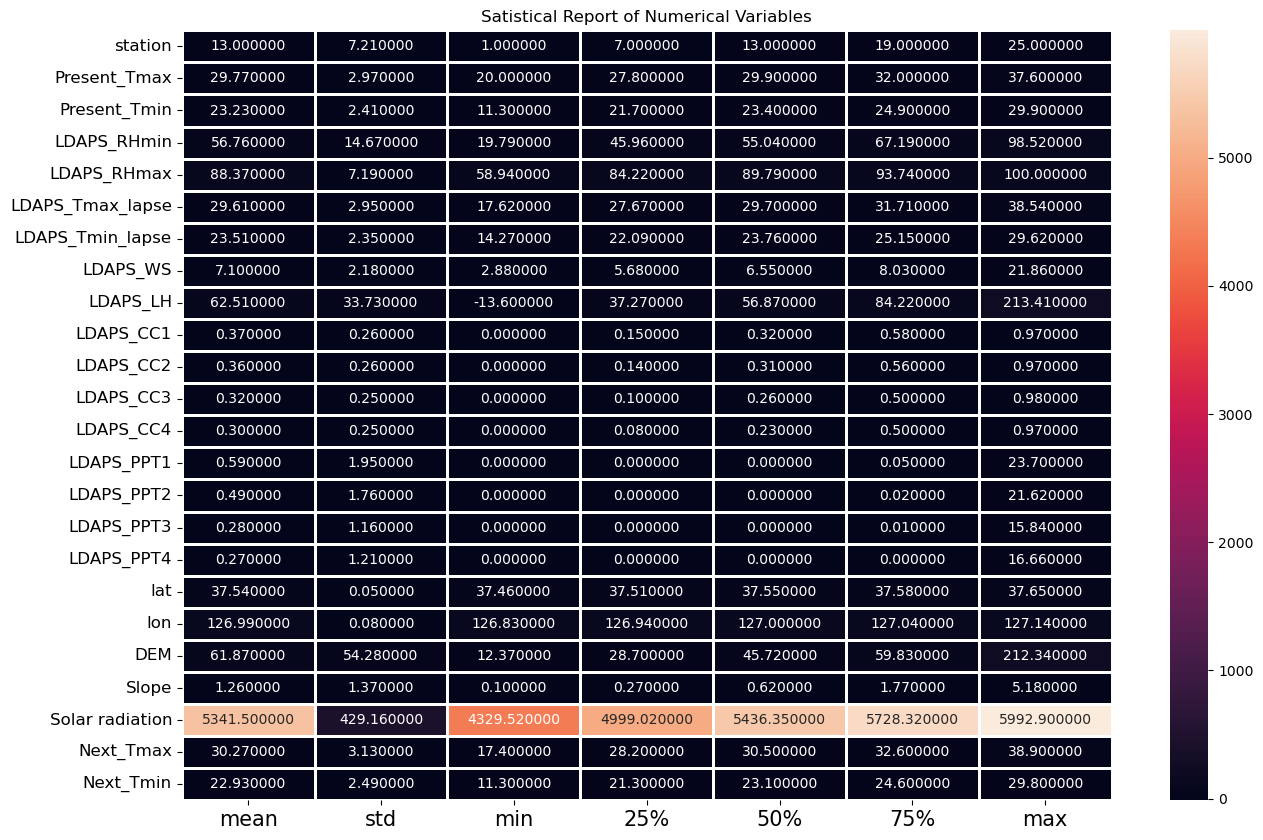

In [11]:
#visualizing statistical description of dataset
plt.figure(figsize = (15,10))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth = 2,annot= True, fmt = "f")
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 12)
plt.title("Satistical Report of Numerical Variables")
plt.show()

In [12]:
#Checking for null values
df.isnull().sum() 

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

<Axes: >

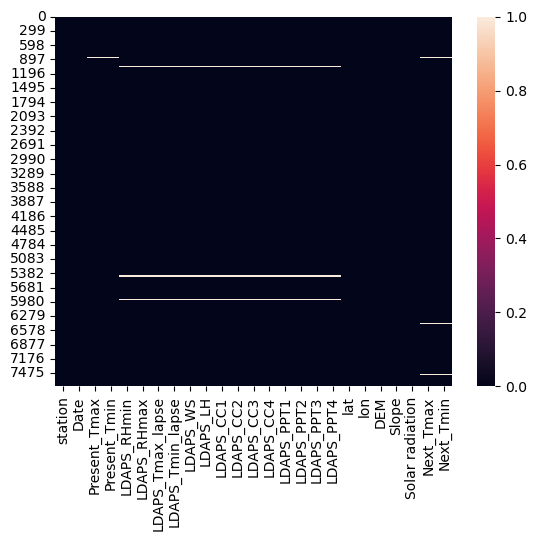

In [13]:
sns.heatmap(df.isnull())

In [14]:
numeric_features=[features for features in df.columns if df[features].dtype!='O']
print('Number Of Numeric Features=',len(numeric_features))
numeric_features

Number Of Numeric Features= 24


['station',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [15]:
categorical_features=[features for features in df.columns if df[features].dtype=='O']
print('Number Of Categorical Features=',len(categorical_features))
categorical_features

Number Of Categorical Features= 1


['Date']

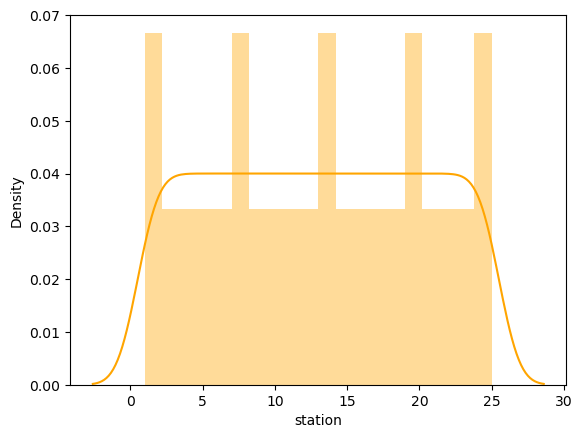

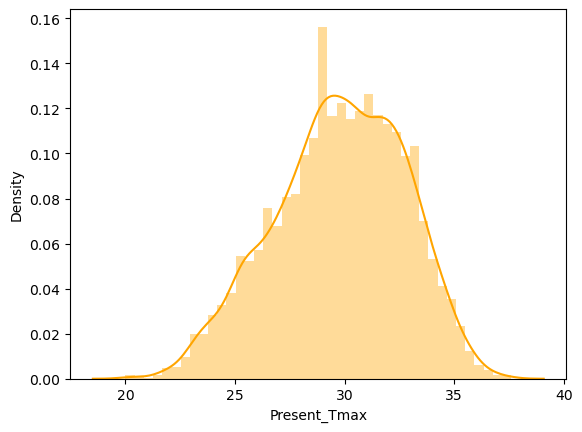

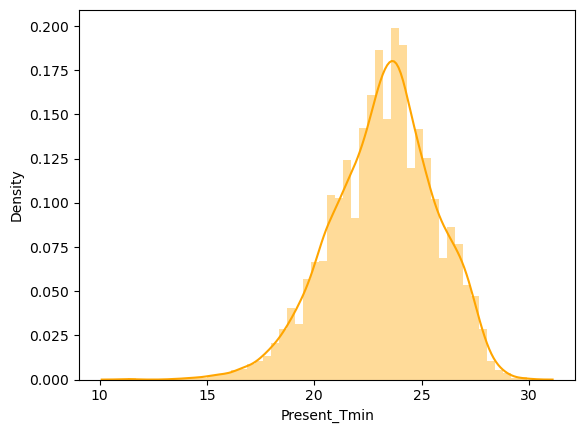

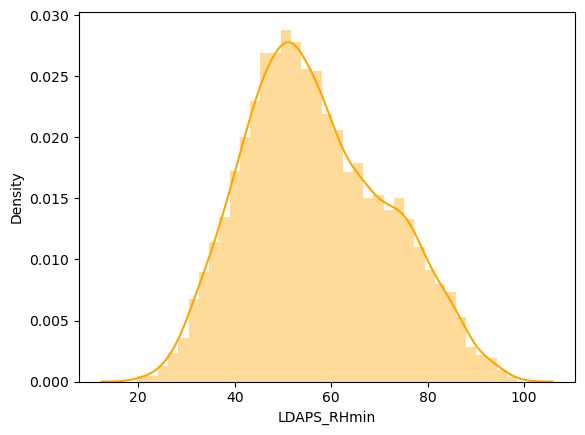

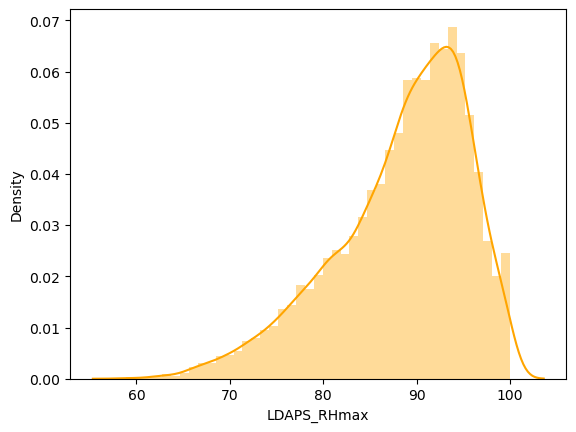

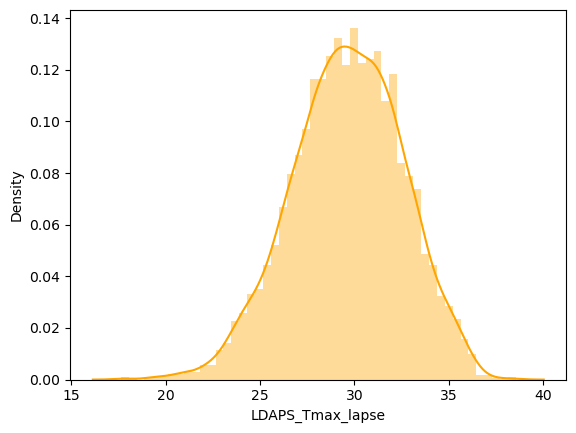

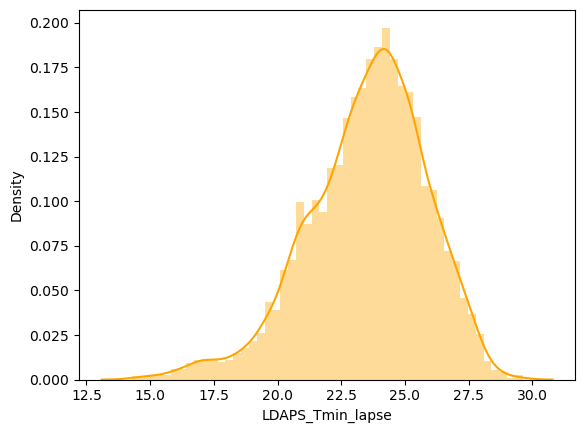

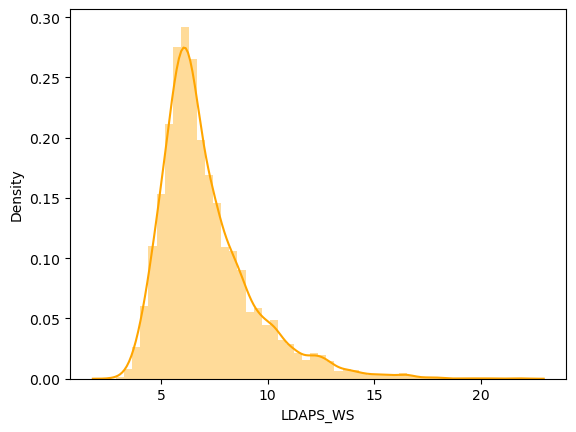

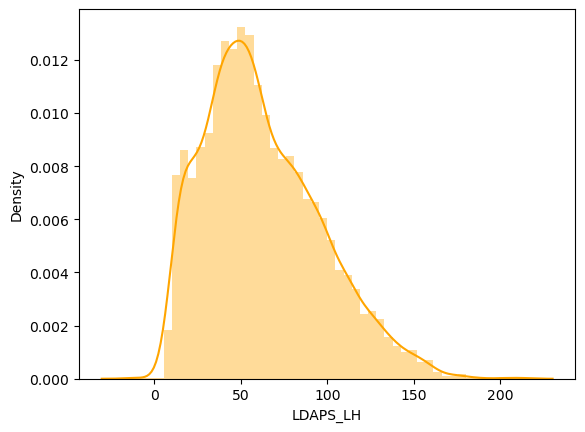

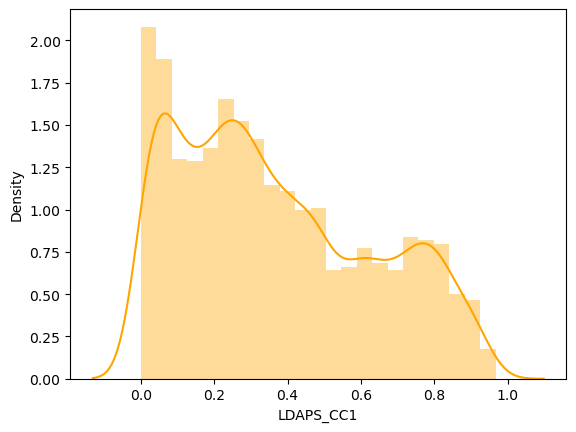

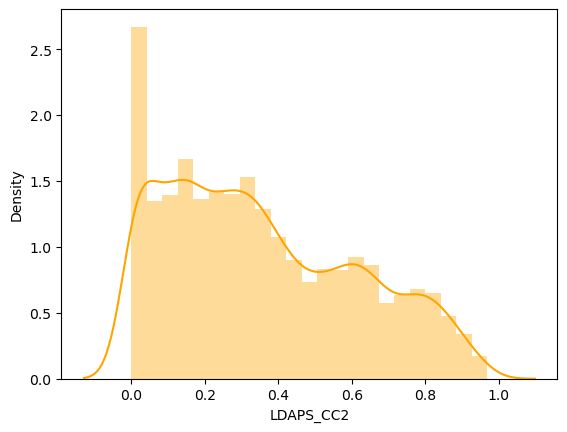

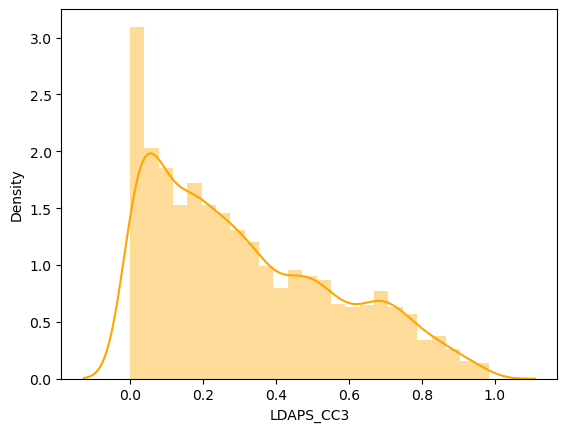

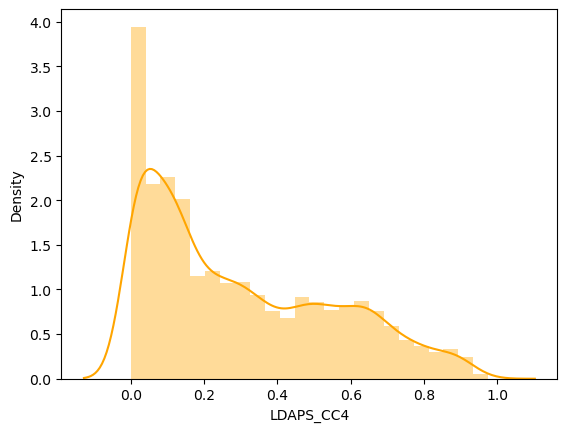

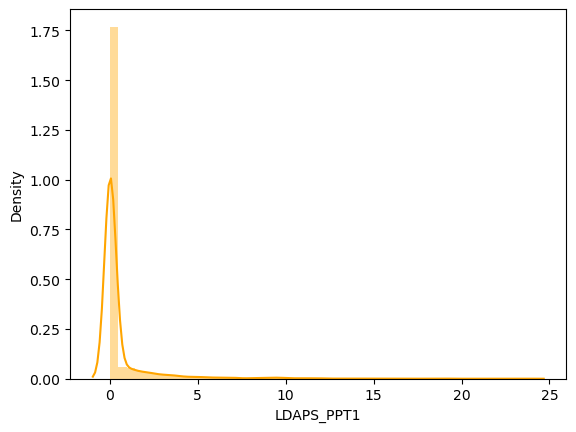

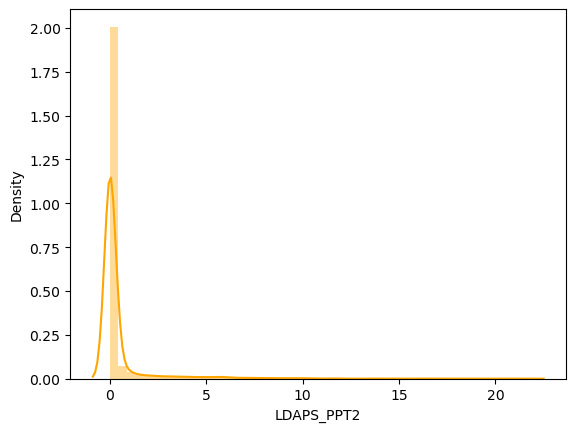

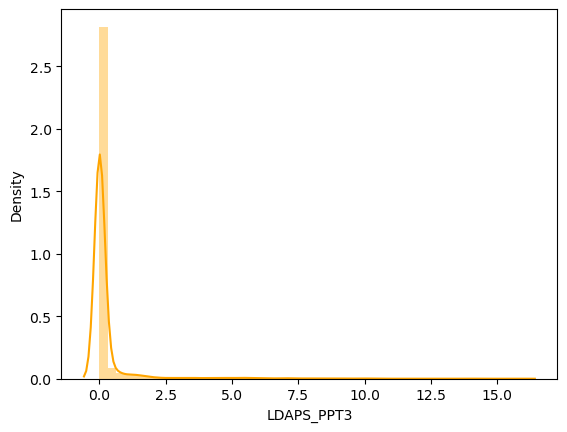

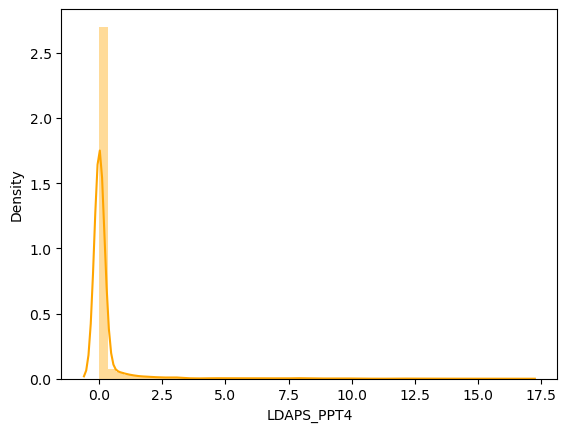

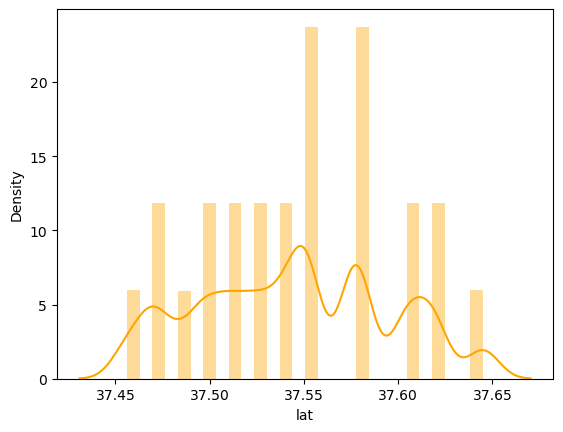

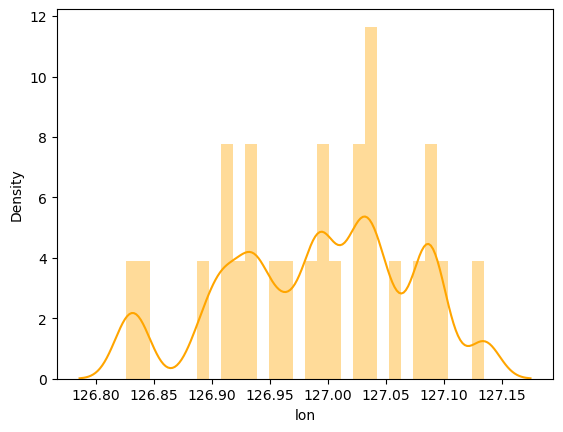

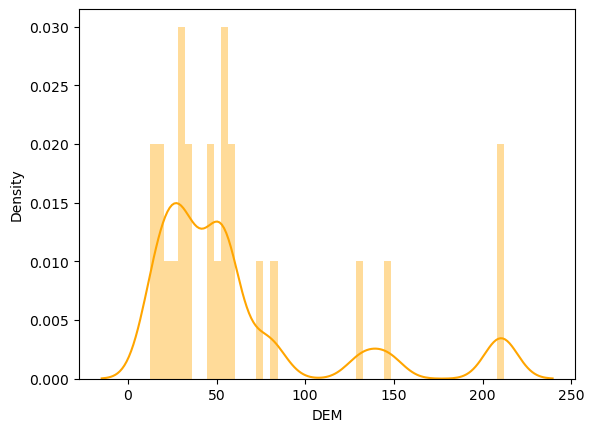

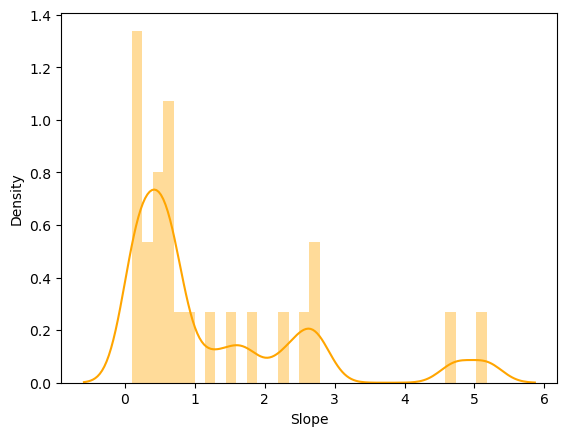

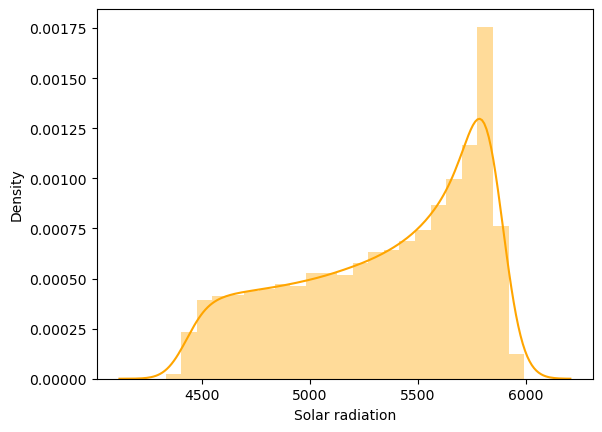

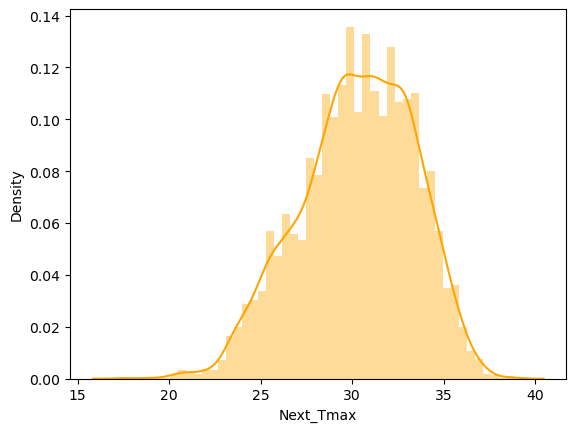

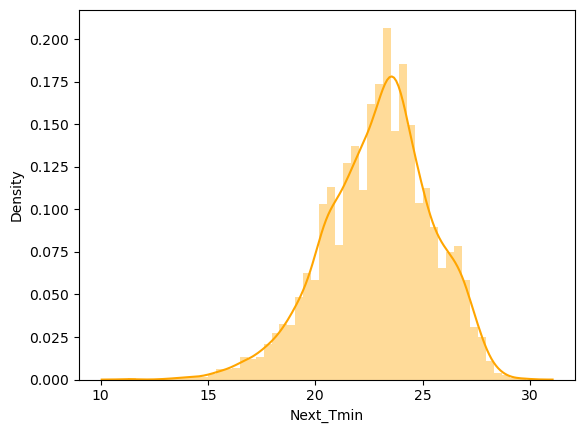

In [16]:
for i in numeric_features:
    plt.figure()
    sns.distplot(df[i],color='orange')

<Axes: xlabel='Date', ylabel='count'>

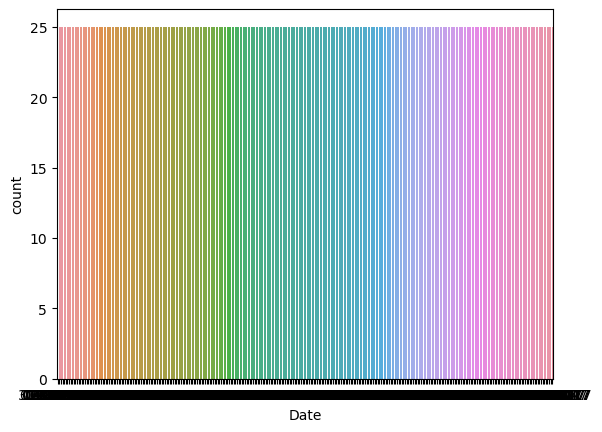

In [18]:
sns.countplot(x='Date', data=df)

In [19]:
df['station'].fillna(df['station'].mode()[0],inplace=True)

In [20]:
df['Date'].fillna(df['Date'].mode()[0],inplace=True)

In [21]:
df['Present_Tmax'].fillna(df['Present_Tmax'].mode()[0],inplace=True)

In [22]:
df['Present_Tmin'].fillna(df['Present_Tmin'].mode()[0],inplace=True)

In [23]:
df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mode()[0],inplace=True)

In [24]:
df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mode()[0],inplace=True)

In [25]:
df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mode()[0],inplace=True)

In [26]:
df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mode()[0],inplace=True)

In [27]:
df['LDAPS_WS'].fillna(df['LDAPS_WS'].mode()[0],inplace=True)

In [28]:
df['LDAPS_LH'].fillna(df['LDAPS_LH'].mode()[0],inplace=True)

In [29]:
df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mode()[0],inplace=True)

In [30]:
df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mode()[0],inplace=True)

In [31]:
df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mode()[0],inplace=True)

In [32]:
df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mode()[0],inplace=True)

In [33]:
df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mode()[0],inplace=True)

In [34]:
df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mode()[0],inplace=True)

In [35]:
df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mode()[0],inplace=True)

In [36]:
df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mode()[0],inplace=True)

In [37]:
df['Next_Tmax'].fillna(df['Next_Tmax'].mode()[0],inplace=True)

In [38]:
df['Next_Tmin'].fillna(df['Next_Tmin'].mode()[0],inplace=True)

In [39]:
#Rechecking for null values after treating them
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

<Axes: >

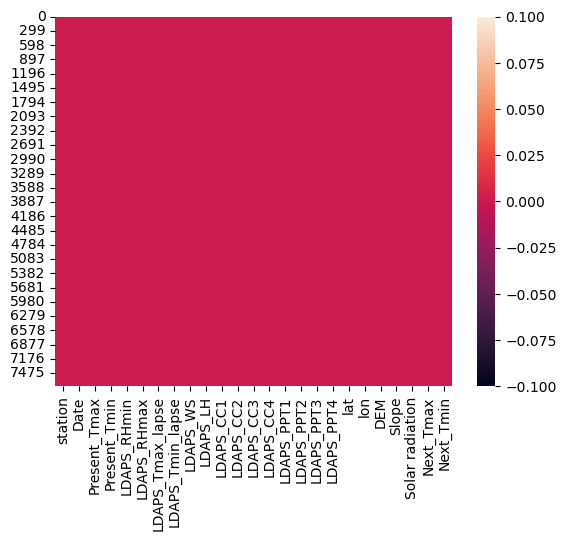

In [40]:
sns.heatmap(df.isnull())

In [41]:
df['Next_Tmax'].value_counts()

29.3    140
33.0    106
31.3    104
29.6    101
31.2     98
29.4     96
30.2     95
29.7     95
29.2     94
32.5     94
30.8     94
29.9     94
30.5     94
32.8     93
32.7     93
33.3     93
31.9     93
29.8     92
32.1     92
31.7     92
30.0     92
30.7     92
31.6     91
32.6     91
30.6     90
30.9     88
31.1     88
30.1     87
31.0     86
33.1     86
31.4     86
32.0     85
29.1     84
31.5     84
28.9     84
32.4     83
32.3     82
32.2     81
30.4     81
32.9     81
29.0     80
28.8     79
30.3     79
33.4     78
28.4     76
31.8     76
29.5     74
28.5     74
28.6     73
28.3     72
28.2     72
33.2     71
33.8     71
28.7     70
27.9     69
33.6     67
33.9     67
34.2     66
34.9     65
33.5     64
34.4     64
27.6     62
28.1     62
28.0     60
34.1     59
34.0     56
27.7     55
33.7     55
27.5     53
27.1     50
26.9     50
27.8     50
26.6     49
26.7     49
25.4     47
34.7     47
27.0     46
27.4     45
34.5     44
34.6     44
25.2     44
27.2     44
26.8     44
25.5

<Axes: xlabel='Next_Tmax'>

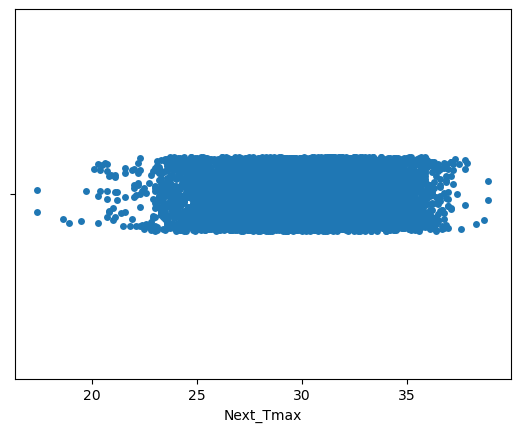

In [43]:
sns.stripplot(x='Next_Tmax', data=df)

In [44]:
df['Next_Tmin'].value_counts()

23.5    186
23.4    157
24.0    156
23.2    150
23.8    149
23.9    142
23.7    135
23.6    133
22.1    133
23.1    129
22.7    127
23.3    125
22.8    125
22.9    123
24.3    122
22.4    120
23.0    119
24.2    116
24.1    116
22.5    113
24.8    111
24.4    103
22.0    102
22.6    102
21.5    102
24.5    102
22.2    101
24.6    100
21.9     99
21.8     99
24.7     99
21.4     95
20.7     94
21.7     92
20.9     92
20.5     91
21.3     90
21.2     89
24.9     87
22.3     85
25.3     84
25.0     81
25.2     81
21.6     77
25.7     76
26.0     75
25.1     75
20.4     73
20.8     72
21.0     71
25.4     71
20.1     69
20.3     68
25.8     66
21.1     66
26.2     65
20.6     65
20.2     62
26.5     61
26.8     58
25.6     58
26.3     55
26.6     53
27.0     52
25.5     52
26.7     52
20.0     51
26.1     49
19.6     48
19.9     47
25.9     47
19.8     46
26.4     45
26.9     45
19.5     44
19.7     41
19.0     39
19.1     37
27.1     36
19.4     36
27.5     35
19.3     34
27.2     34
19.2

<Axes: xlabel='Next_Tmin'>

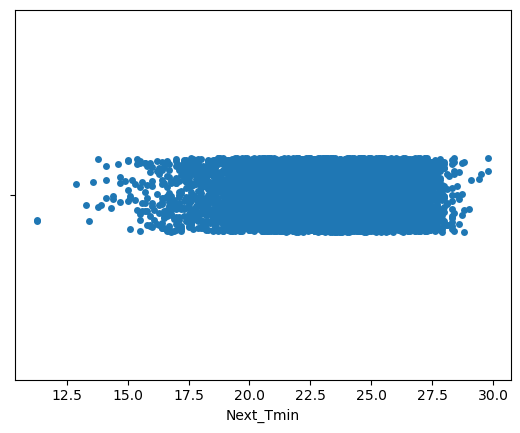

In [45]:
sns.stripplot(x='Next_Tmin', data=df)

In [46]:
data1 = df['Next_Tmax'].value_counts()

In [47]:
data2 = df['Next_Tmin'].value_counts()

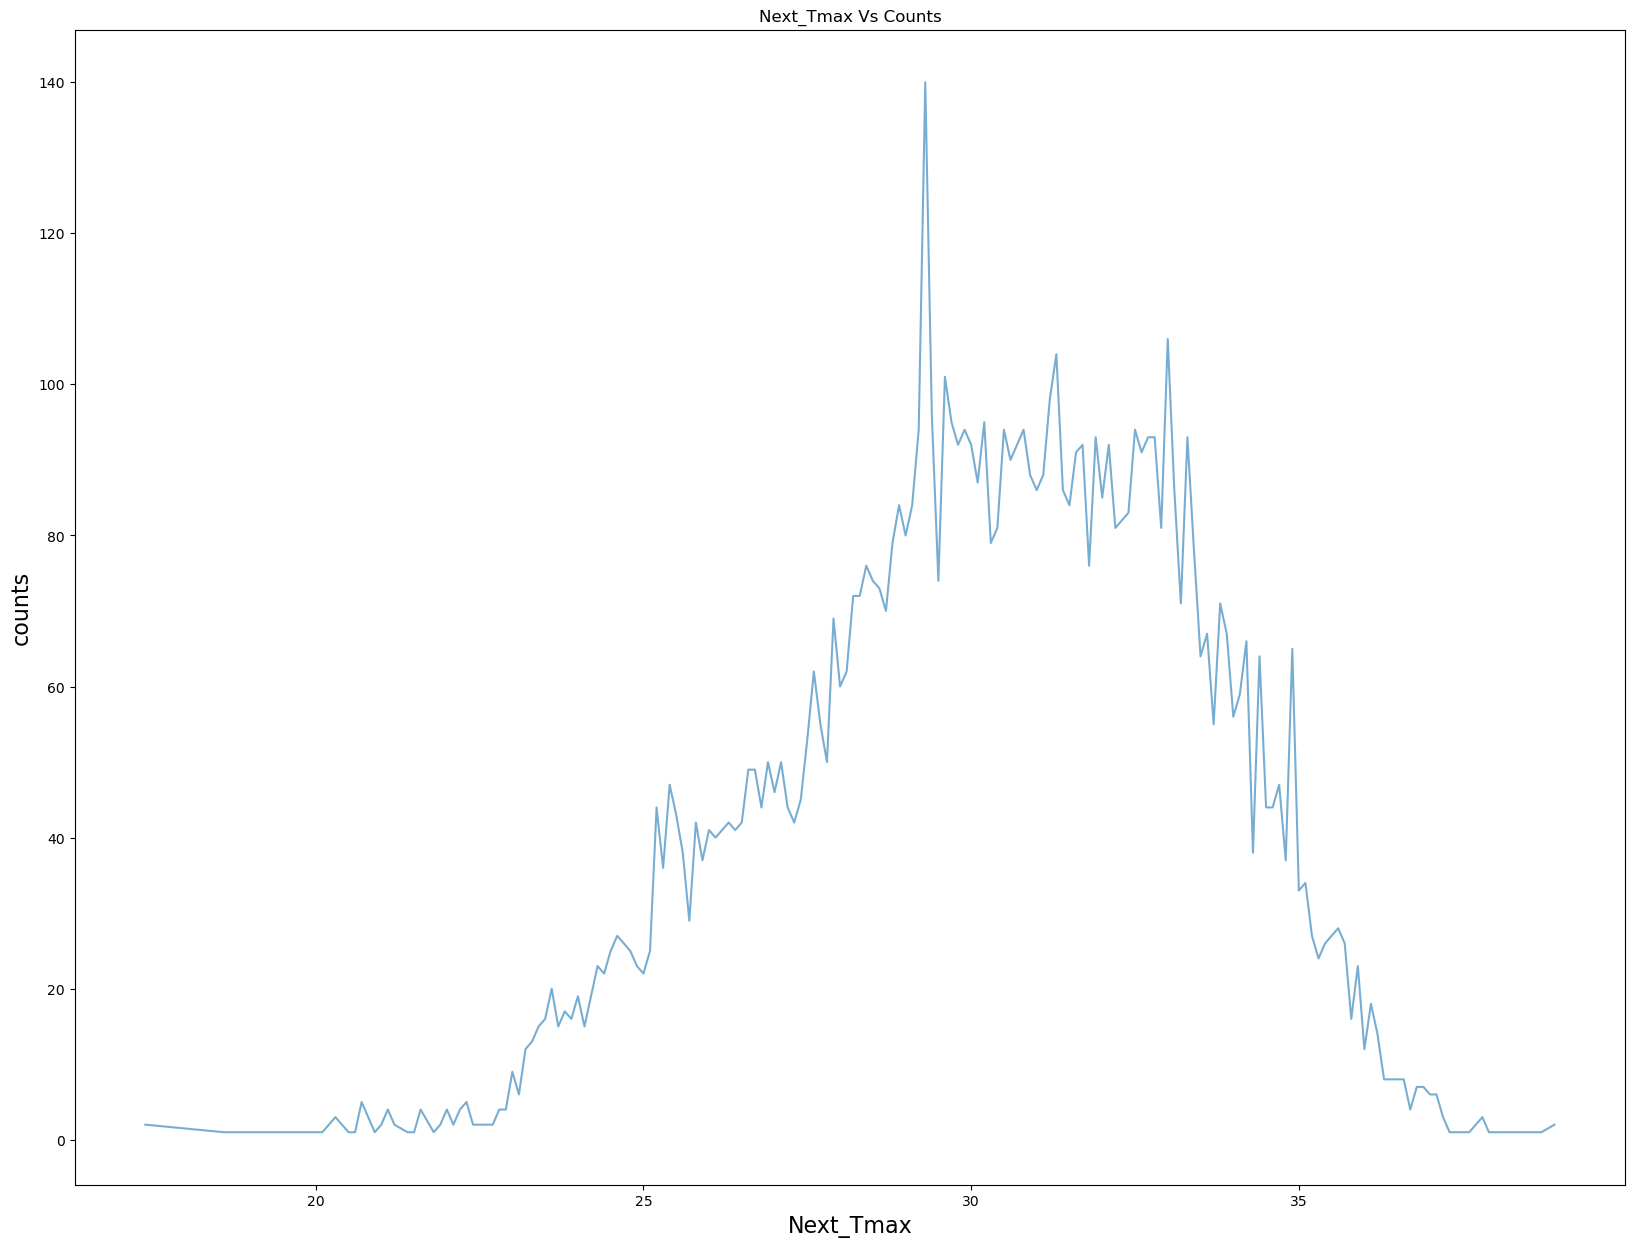

In [50]:
plt.figure(figsize=(20,15))
sns.lineplot(x=data1.index, y=data1.values, alpha=0.6)
plt.xlabel('Next_Tmax', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Next_Tmax Vs Counts')
plt.show()

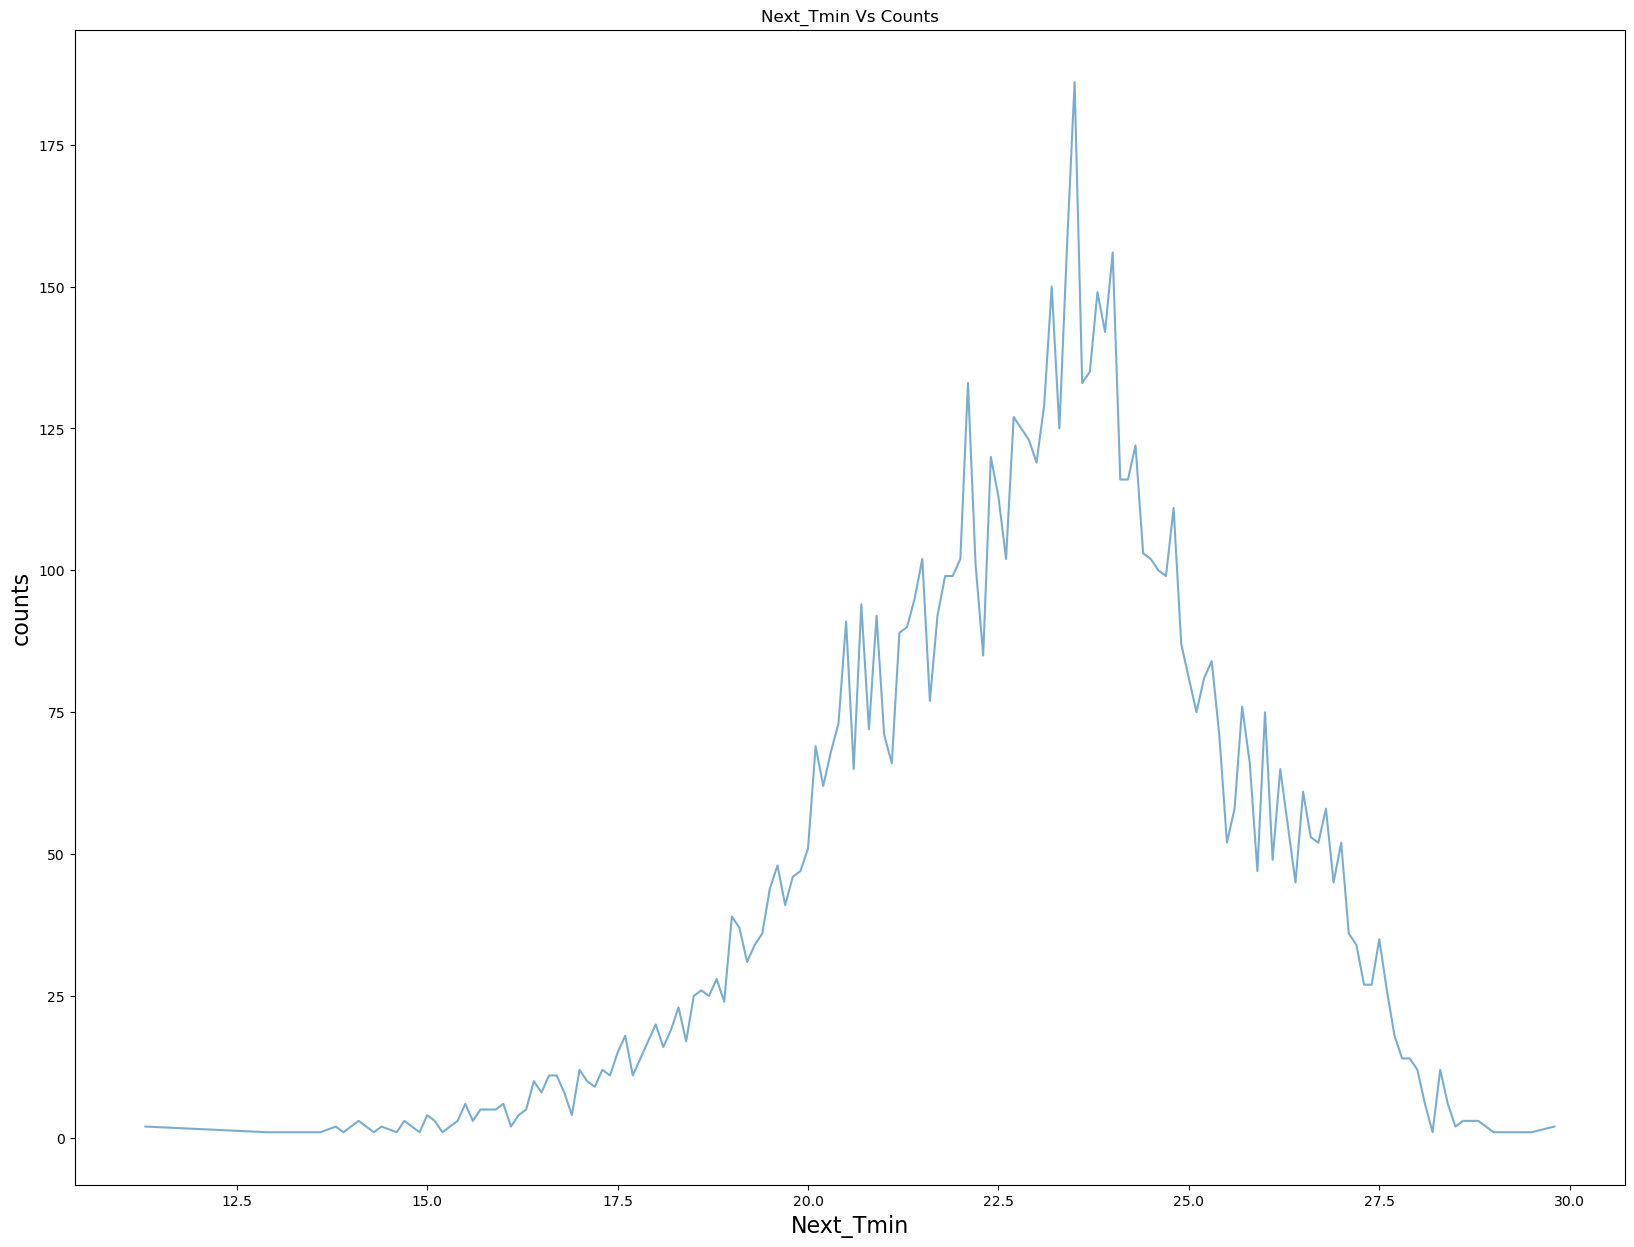

In [55]:
plt.figure(figsize=(20,15))
sns.lineplot(x=data2.index,y=data2.values,alpha=0.6)
plt.xlabel('Next_Tmin', fontsize=16)
plt.ylabel('counts',fontsize=16)
plt.title('Next_Tmin Vs Counts')
plt.show()

In [56]:
df = df.drop(columns=['Date'])

In [57]:
df.shape

(7752, 24)

In [58]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,...,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.996904,29.782946,23.232056,56.401741,88.089988,29.497459,23.423193,7.057092,61.768678,0.365206,...,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.271491,22.934198
std,7.213213,2.960585,2.404154,15.038788,7.715499,3.158976,2.503109,2.212072,34.383864,0.263668,...,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.123085,2.483502
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.735368,84.038809,27.601014,22.032374,5.647741,36.776474,0.141643,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000
50%,13.000000,30.000000,23.400000,54.828714,89.699505,29.662273,23.735942,6.531345,56.487289,0.312156,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,...,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


In [59]:
corr = df.corr()
corr

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,0.111707,0.131483,-0.064828,-0.154365,0.064331,0.097898,0.004152,-0.130618,0.006658,...,-0.010771,-0.015291,-0.013277,-0.237467,-0.118603,-0.256138,-0.090461,-0.018814,0.108569,0.128390
Present_Tmax,0.111707,1.000000,0.619221,-0.214998,-0.305792,0.501246,0.554768,-0.132777,0.116041,-0.318215,...,-0.101060,-0.121982,-0.100315,-0.053099,0.008635,-0.187098,-0.106605,-0.024943,0.608681,0.621846
Present_Tmin,0.131483,0.619221,1.000000,0.090367,-0.059385,0.384882,0.666980,-0.056793,-0.035814,0.066901,...,0.064903,-0.049043,-0.065192,-0.078764,-0.043659,-0.250294,-0.146821,0.053823,0.470941,0.796333
LDAPS_RHmin,-0.064828,-0.214998,0.090367,1.000000,0.611314,-0.419389,0.167924,0.325582,-0.015007,0.623117,...,0.385851,0.239174,0.168888,0.084541,-0.073998,0.099121,0.120115,0.248989,-0.454425,0.070956
LDAPS_RHmax,-0.154365,-0.305792,-0.059385,0.611314,1.000000,-0.182835,0.036238,0.193008,0.296986,0.452374,...,0.222500,0.133626,0.117501,0.181629,0.023808,0.164355,0.203716,0.157210,-0.308550,-0.100040
LDAPS_Tmax_lapse,0.064331,0.501246,0.384882,-0.419389,-0.182835,1.000000,0.700427,-0.215284,0.124012,-0.352365,...,-0.214661,-0.165856,-0.140607,-0.039079,0.084176,-0.166084,-0.150705,0.063188,0.723211,0.511372
LDAPS_Tmin_lapse,0.097898,0.554768,0.666980,0.167924,0.036238,0.700427,1.000000,-0.051714,-0.044372,0.059542,...,0.010587,-0.074058,-0.080301,-0.089752,-0.024898,-0.182240,-0.173282,0.167306,0.503437,0.788360
LDAPS_WS,0.004152,-0.132777,-0.056793,0.325582,0.193008,-0.215284,-0.051714,1.000000,0.046855,0.307226,...,0.193496,0.163195,0.145619,0.036014,-0.058423,0.187704,0.168621,0.128987,-0.359371,-0.111450
LDAPS_LH,-0.130618,0.116041,-0.035814,-0.015007,0.296986,0.124012,-0.044372,0.046855,1.000000,-0.112777,...,-0.069813,0.020818,0.024259,0.130056,0.025208,0.053829,0.084725,-0.035381,0.127318,-0.073270
LDAPS_CC1,0.006658,-0.318215,0.066901,0.623117,0.452374,-0.352365,0.059542,0.307226,-0.112777,1.000000,...,0.389348,0.170330,0.093844,-0.008054,-0.006779,-0.013954,-0.020553,0.223127,-0.465100,-0.022926


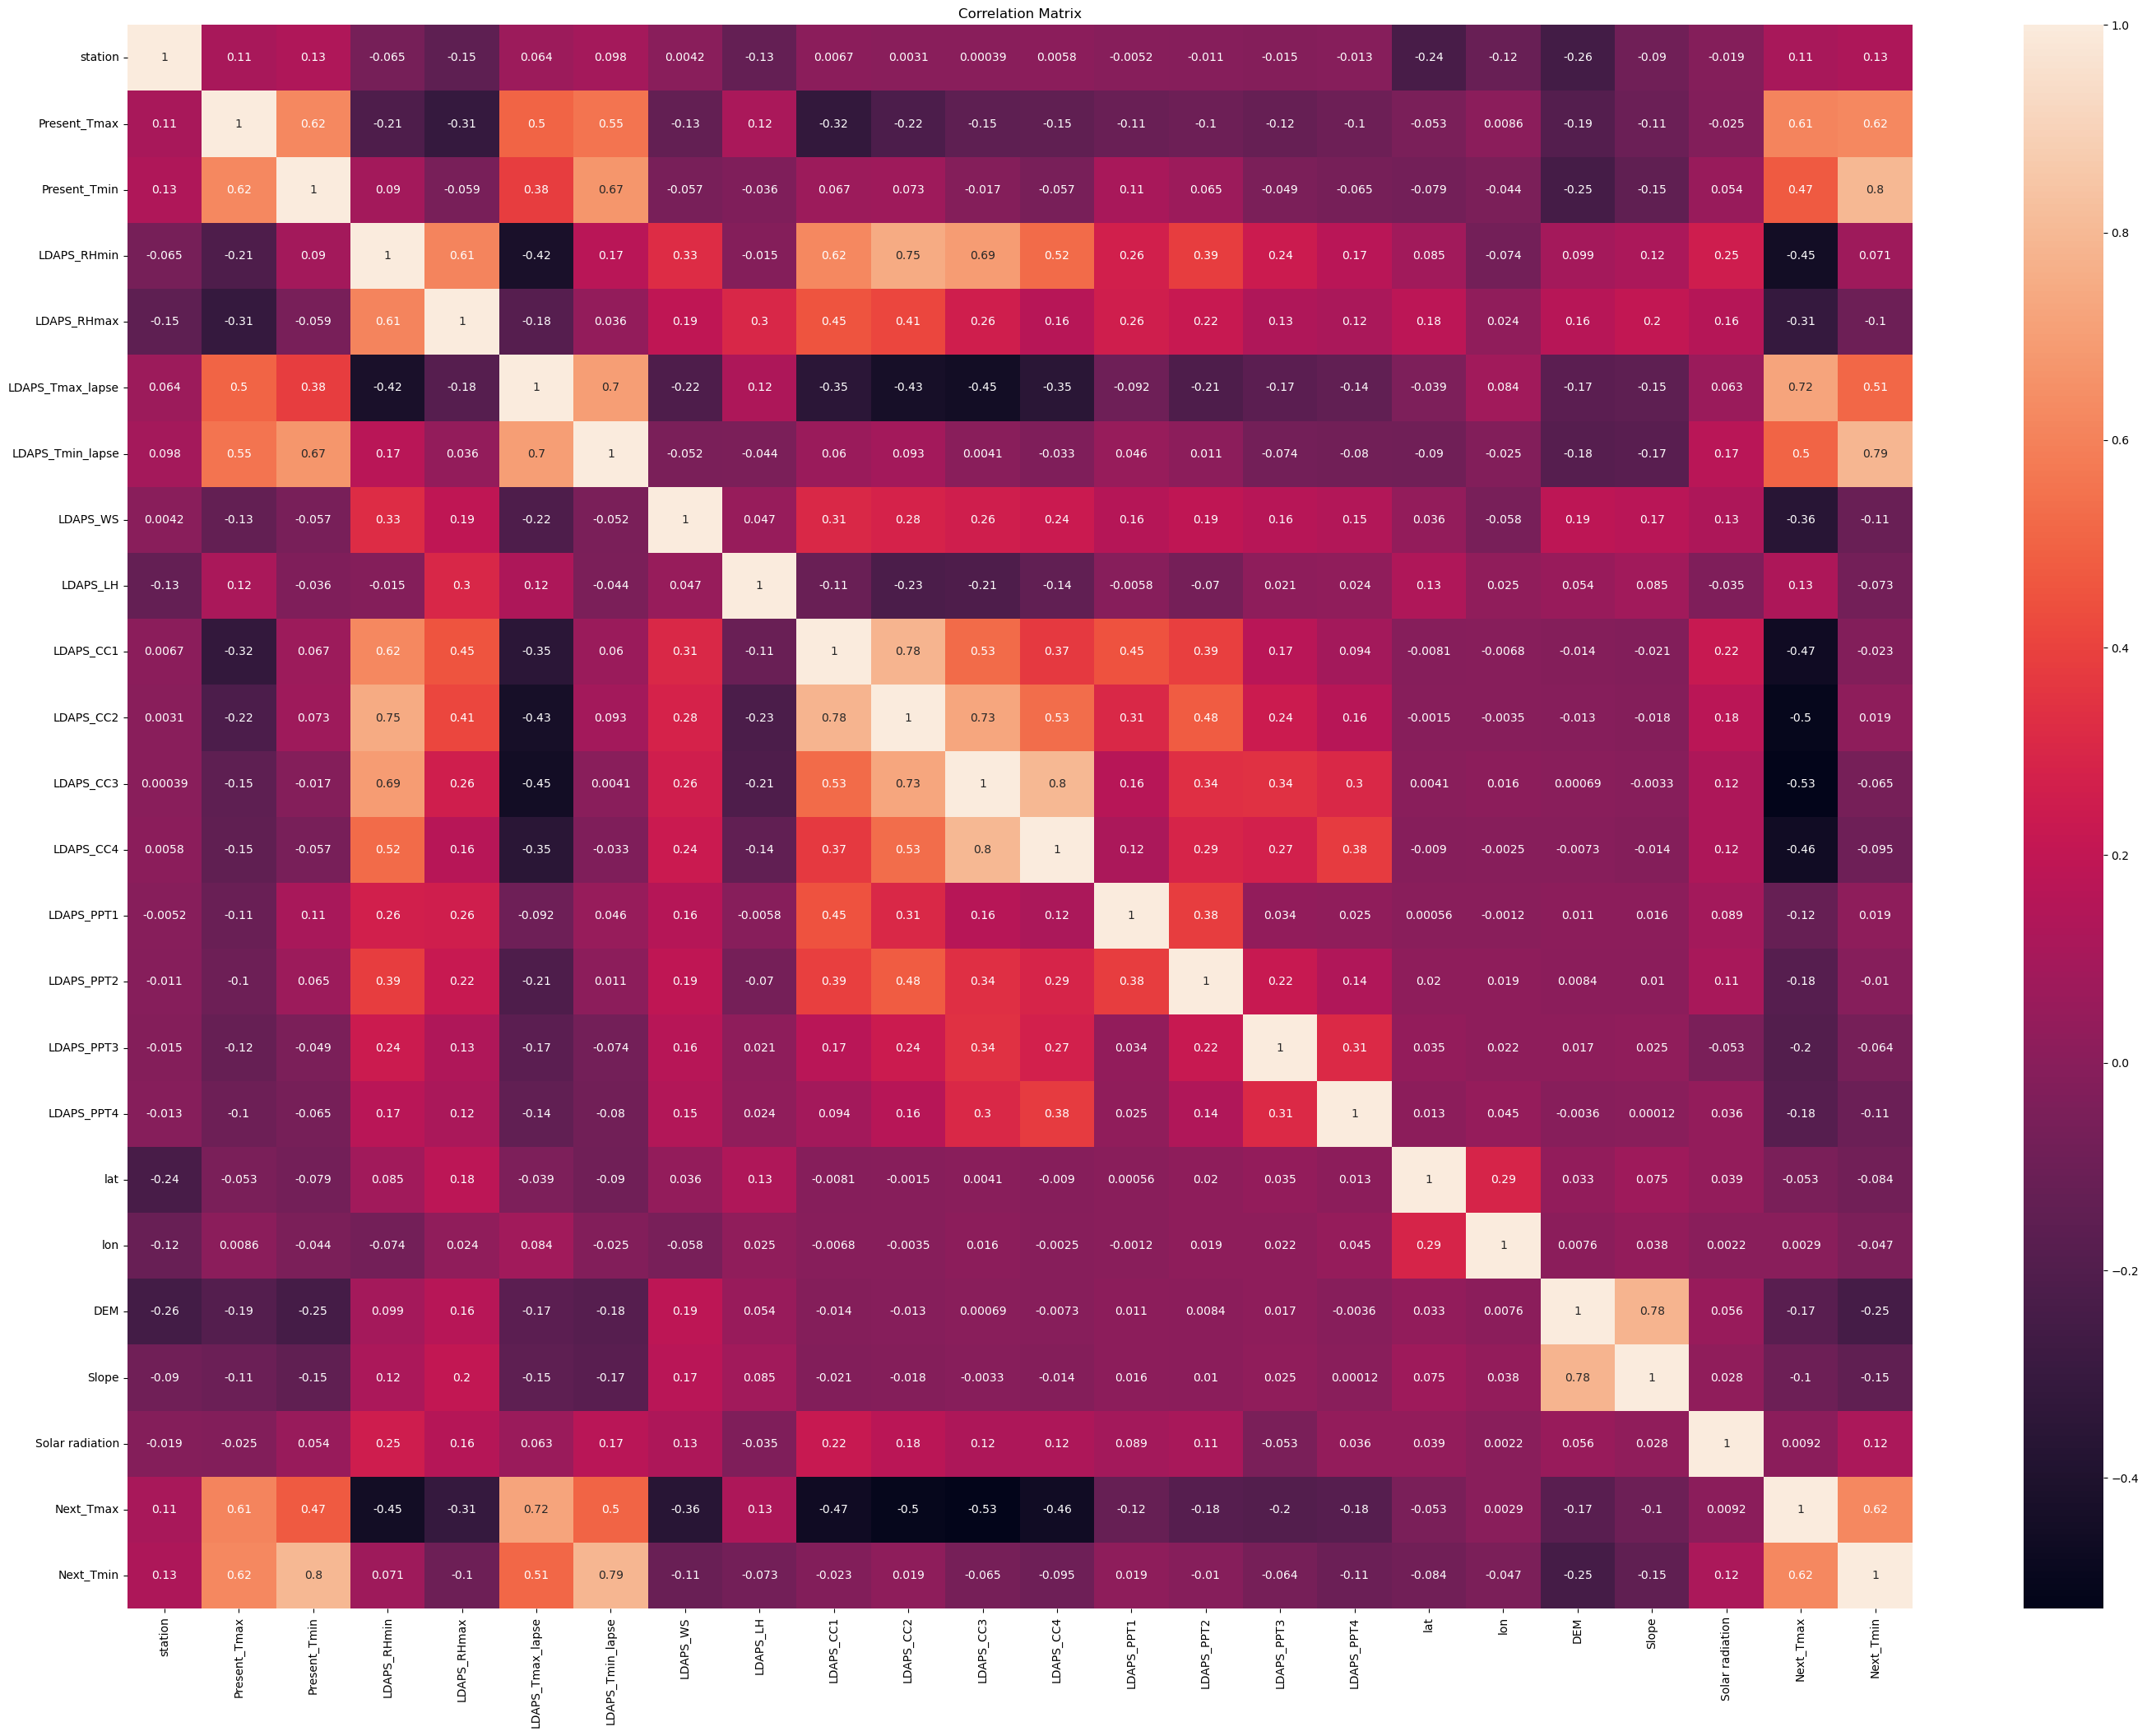

In [60]:
plt.figure(figsize=(35,25))
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
def valcal():
    vif=pd.DataFrame()
    vif['vif factor']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['features']=df.columns
    print(vif)

In [63]:
valcal()

       vif factor          features
0        5.107826           station
1      294.320684      Present_Tmax
2      315.674840      Present_Tmin
3       99.758300       LDAPS_RHmin
4      327.891338       LDAPS_RHmax
5      697.934214  LDAPS_Tmax_lapse
6      899.891577  LDAPS_Tmin_lapse
7       14.994342          LDAPS_WS
8        6.620015          LDAPS_LH
9       10.515627         LDAPS_CC1
10      15.183526         LDAPS_CC2
11      13.702901         LDAPS_CC3
12       7.195707         LDAPS_CC4
13       1.551324        LDAPS_PPT1
14       1.633708        LDAPS_PPT2
15       1.353526        LDAPS_PPT3
16       1.337178        LDAPS_PPT4
17  650729.300571               lat
18  648779.083996               lon
19       7.404383               DEM
20       5.556445             Slope
21     186.934028   Solar radiation
22     439.349756         Next_Tmax
23     499.972460         Next_Tmin


station                Axes(0.125,0.798085;0.110714x0.0819149)
Present_Tmax        Axes(0.257857,0.798085;0.110714x0.0819149)
Present_Tmin        Axes(0.390714,0.798085;0.110714x0.0819149)
LDAPS_RHmin         Axes(0.523571,0.798085;0.110714x0.0819149)
LDAPS_RHmax         Axes(0.656429,0.798085;0.110714x0.0819149)
LDAPS_Tmax_lapse    Axes(0.789286,0.798085;0.110714x0.0819149)
LDAPS_Tmin_lapse       Axes(0.125,0.699787;0.110714x0.0819149)
LDAPS_WS            Axes(0.257857,0.699787;0.110714x0.0819149)
LDAPS_LH            Axes(0.390714,0.699787;0.110714x0.0819149)
LDAPS_CC1           Axes(0.523571,0.699787;0.110714x0.0819149)
LDAPS_CC2           Axes(0.656429,0.699787;0.110714x0.0819149)
LDAPS_CC3           Axes(0.789286,0.699787;0.110714x0.0819149)
LDAPS_CC4              Axes(0.125,0.601489;0.110714x0.0819149)
LDAPS_PPT1          Axes(0.257857,0.601489;0.110714x0.0819149)
LDAPS_PPT2          Axes(0.390714,0.601489;0.110714x0.0819149)
LDAPS_PPT3          Axes(0.523571,0.601489;0.110714x0.0

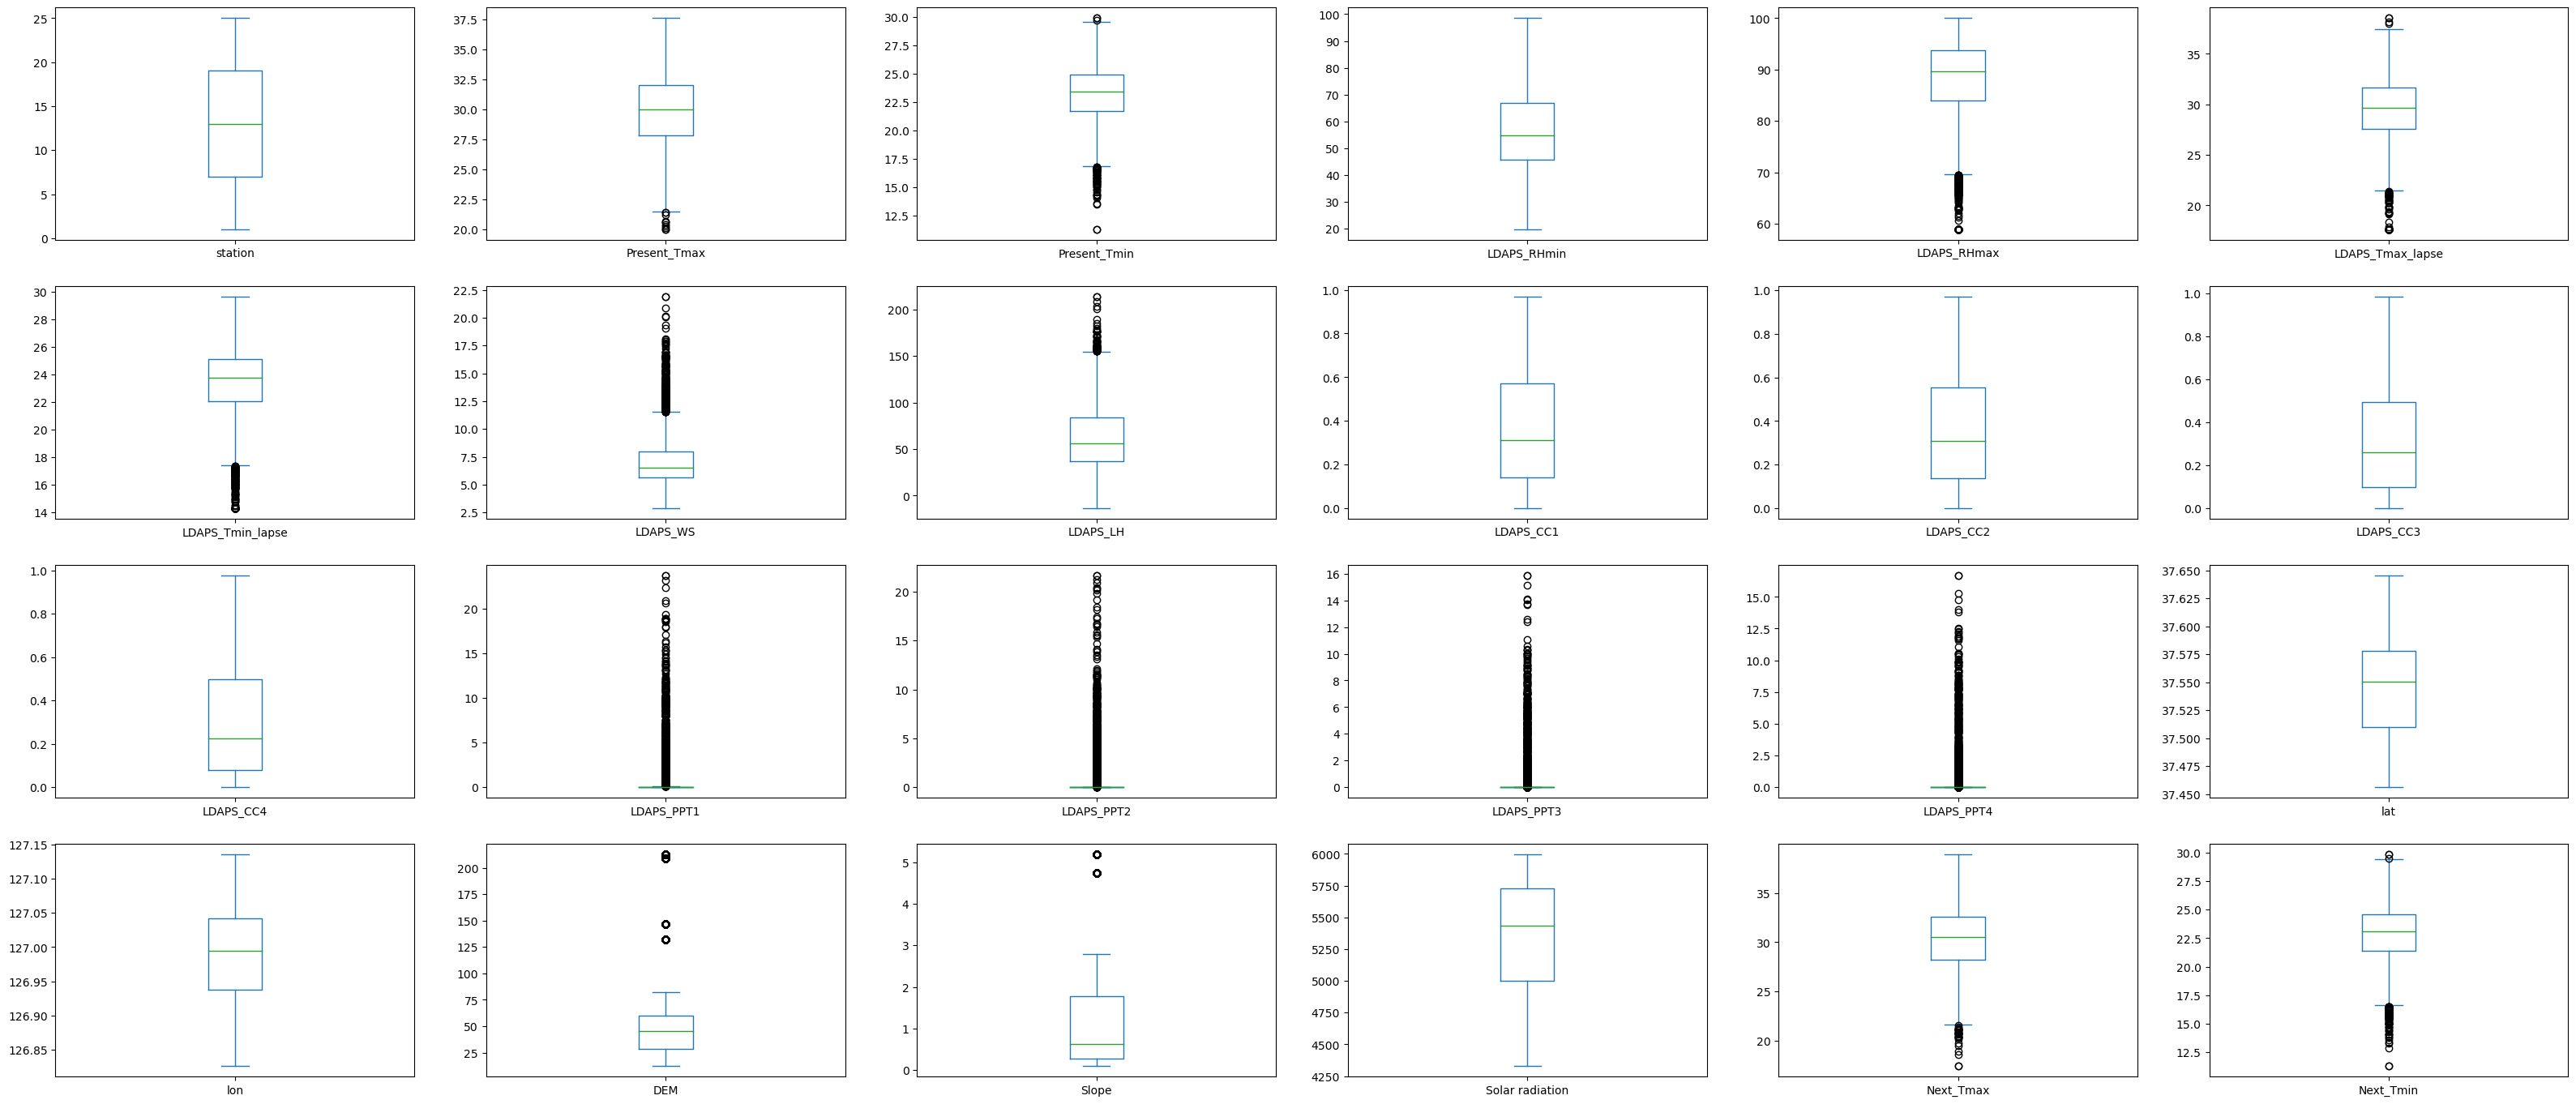

In [64]:
df.plot(kind='box',subplots =True, layout=(8,6),figsize=(40,35))

In [65]:
from scipy.stats import zscore 
from scipy import stats
z = np.abs(stats.zscore(df))
z.shape

(7752, 24)

In [66]:
index = (np.where(z>7)[0])
df = df.drop(df.index[index])
df.shape

(7619, 24)

In [67]:
loss_percent=(7752-7619)/7752*100
print(loss_percent)

1.715686274509804


After removing skewness, the total amount of lost data is 1.7156%.

In [68]:
df.skew()

station            -0.001210
Present_Tmax       -0.291902
Present_Tmin       -0.383474
LDAPS_RHmin         0.207022
LDAPS_RHmax        -1.096611
LDAPS_Tmax_lapse   -0.621092
LDAPS_Tmin_lapse   -0.859525
LDAPS_WS            1.476459
LDAPS_LH            0.573309
LDAPS_CC1           0.479767
LDAPS_CC2           0.476060
LDAPS_CC3           0.664357
LDAPS_CC4           0.688315
LDAPS_PPT1          4.585924
LDAPS_PPT2          4.697430
LDAPS_PPT3          5.740124
LDAPS_PPT4          6.550165
lat                 0.086349
lon                -0.282312
DEM                 1.724629
Slope               1.567143
Solar radiation    -0.513336
Next_Tmax          -0.339540
Next_Tmin          -0.413739
dtype: float64

In [69]:
from sklearn.preprocessing import power_transform

In [70]:
#removing skewness
x1=power_transform(df,method='yeo-johnson')
x1=pd.DataFrame(df)

In [71]:
x1.skew()

station            -0.001210
Present_Tmax       -0.291902
Present_Tmin       -0.383474
LDAPS_RHmin         0.207022
LDAPS_RHmax        -1.096611
LDAPS_Tmax_lapse   -0.621092
LDAPS_Tmin_lapse   -0.859525
LDAPS_WS            1.476459
LDAPS_LH            0.573309
LDAPS_CC1           0.479767
LDAPS_CC2           0.476060
LDAPS_CC3           0.664357
LDAPS_CC4           0.688315
LDAPS_PPT1          4.585924
LDAPS_PPT2          4.697430
LDAPS_PPT3          5.740124
LDAPS_PPT4          6.550165
lat                 0.086349
lon                -0.282312
DEM                 1.724629
Slope               1.567143
Solar radiation    -0.513336
Next_Tmax          -0.339540
Next_Tmin          -0.413739
dtype: float64

In [72]:
x=x1

#### 1. Next_Tmax: Next day maximum temperature as Target value

In [73]:
#splitting dataset into x and y.

y = df['Next_Tmax']
x = df.drop(columns=['Next_Tmax'])

In [74]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmin
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,21.2
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,22.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,23.9
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,24.3
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,22.5


In [75]:
y.head()

0    29.1
1    30.5
2    31.1
3    31.7
4    31.2
Name: Next_Tmax, dtype: float64

In [76]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.66616477, -0.37281249, -0.75861043, ...,  1.11783472,
         1.52156079, -0.69765552],
       [-1.52742848,  0.70823731, -0.67550807, ..., -0.54088007,
         1.23354808, -0.17556168],
       [-1.38869219,  0.60688889,  0.03086208, ..., -0.72202467,
         1.22013171,  0.38669323],
       ...,
       [ 1.52476993, -2.19708403, -2.29600427, ..., -0.75401714,
        -2.10127113, -1.66152108],
       [ 1.66350622, -2.23086683, -2.42065782, ..., -0.71822647,
        -2.07104049, -2.22377599],
       [-1.66616477, -3.31191663, -4.95528009, ..., -0.84446191,
        -2.35495433, -4.67360095]])

In [77]:
# Split data into train and test.
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge,Lasso, RidgeCV, LassoCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve,roc_auc_score

regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [79]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

30.292130089234753
[ 0.13635472  0.4344458  -0.06505067  0.01968699 -0.14520608  1.31984707
 -0.77857813 -0.45605918  0.16769338 -0.22326732 -0.32633634 -0.21873632
 -0.3643335   0.02363565  0.27174578  0.00437651  0.12678941  0.01735918
 -0.07303493  0.10741682 -0.00444348  0.12245609  1.57675788]


In [80]:
# Adjusted R2 Score 

regression.score(x_train,y_train)

0.7838075064755885

In [81]:
regression.score(x_test,y_test)

0.7799358041314153

In [82]:
y_pred = regression.predict(x_test)
y_pred

array([30.71197986, 29.70889451, 34.91559405, ..., 35.52152873,
       32.09041605, 30.83126141])

In [83]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
7436,27.4,30.711980
3476,28.6,29.708895
7017,34.4,34.915594
920,27.6,29.230589
7557,28.9,28.516944
1529,28.7,29.216441
6715,32.0,32.677188
4114,32.1,31.395778
3735,30.9,29.717337
1084,32.4,32.660033


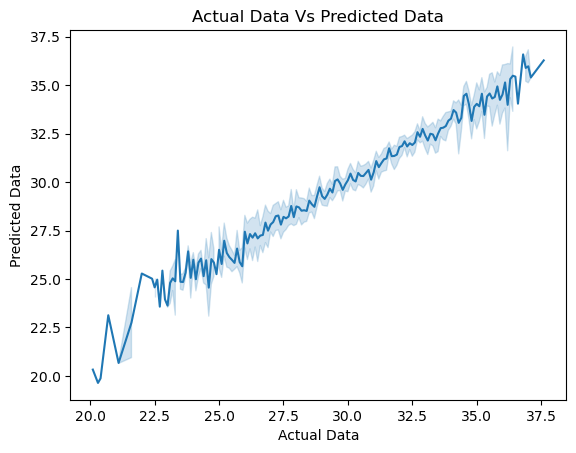

In [85]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [86]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 1.1144616895584234
Mean squared error : 2.117565534275863
Root mean squared error : 1.4551857387549751


In [90]:
from sklearn.linear_model import LassoCV

lasscv = LassoCV(alphas=None, max_iter=1000, precompute=True)
lasscv.fit(x_train, y_train)

LassoCV(precompute=True)

In [91]:
alpha = lasscv.alpha_
alpha

0.004155015775093504

In [92]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.004155015775093504)

In [93]:
lasso_reg.score(x_test,y_test)

0.7799412362614873

In [94]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score

In [95]:
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [96]:
y_pred = ada.predict(x_train)
print("R square score:",r2_score(y_train,y_pred))

R square score: 0.7691474870840889


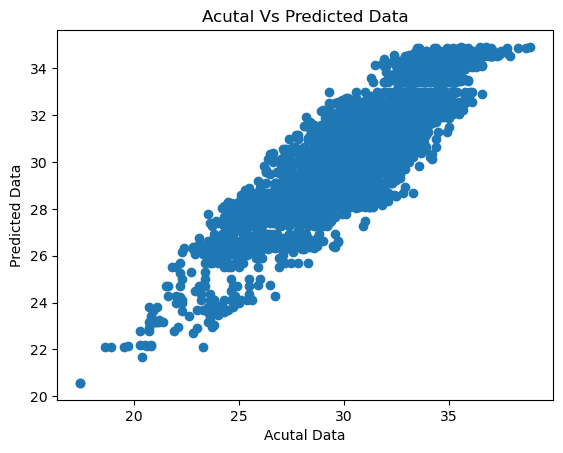

In [97]:
plt.scatter(y_train,y_pred)
plt.xlabel('Acutal Data')
plt.ylabel('Predicted Data')
plt.title('Acutal Vs Predicted Data')
plt.show()

In [98]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 

In [99]:
dt = DecisionTreeRegressor()
params = {'n_estimators':[40,47,49,50],
         'learning_rate':[0.30,0.40,0.45]}

In [100]:
rad_scr = RandomizedSearchCV(AdaBoostRegressor(),cv=2,param_distributions=params)

In [101]:
rad_scr.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [102]:
rad_scr.best_params_

{'n_estimators': 50, 'learning_rate': 0.4}

In [103]:
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.45,n_estimators=50)

In [104]:
ada.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), learning_rate=0.45)

In [105]:
y_pred=ada.predict(x_test)

In [106]:
print('***Accuracy post tuning***')
print(r2_score(y_test,y_pred))

***Accuracy post tuning***
0.9158145670276389


### Saving Model

In [107]:
#saving Model
import joblib
joblib.dump(regression,"TemperaturePrediction-Next_Tmax.pkl")

['TemperaturePrediction-Next_Tmax.pkl']

#### 2. Next_Tmin: Next day minimum temperature as Target Value

In [108]:
#splitting dataset into x and y.
y = df['Next_Tmin']
x = df.drop(columns=['Next_Tmin'])

In [109]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2


In [110]:
y.head()

0    21.2
1    22.5
2    23.9
3    24.3
4    22.5
Name: Next_Tmin, dtype: float64

In [111]:
# Data Scaling
#StandardScaler = (X-mean)/std
from sklearn.preprocessing import StandardScaler   

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-1.66616477, -0.37281249, -0.75861043, ...,  1.11783472,
         1.52156079, -0.38547975],
       [-1.52742848,  0.70823731, -0.67550807, ..., -0.54088007,
         1.23354808,  0.0649758 ],
       [-1.38869219,  0.60688889,  0.03086208, ..., -0.72202467,
         1.22013171,  0.25802819],
       ...,
       [ 1.52476993, -2.19708403, -2.29600427, ..., -0.75401714,
        -2.10127113, -0.54635674],
       [ 1.66350622, -2.23086683, -2.42065782, ..., -0.71822647,
        -2.07104049, -0.80375991],
       [-1.66616477, -3.31191663, -4.95528009, ..., -0.84446191,
        -2.35495433, -4.1500012 ]])

In [112]:
# Split data into train and test.
from sklearn.model_selection import train_test_split  #importing requried lib.

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=340)

In [113]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [114]:
# To find Intercept
print(regression.intercept_)

# To find coefficients
print(regression.coef_)

22.943101041960723
[-0.07111087  0.00350974  0.81182011  0.03425329 -0.08473347 -0.77721694
  1.43206849  0.06344747 -0.11160567 -0.04045156  0.11880393 -0.13211943
  0.10402097 -0.01642414 -0.10364247  0.07707667 -0.08071972  0.00457681
  0.02708991 -0.29665518  0.24089336  0.06276625  1.00115216]


In [115]:
regression.score(x_train,y_train)

0.8277443047575859

In [116]:
regression.score(x_test,y_test)

0.8246319249971018

In [117]:
y_pred = regression.predict(x_test)
y_pred

array([20.05935153, 20.14075765, 24.35698864, ..., 26.57377531,
       24.32330263, 20.72554205])

In [118]:
data = pd.DataFrame({'Acutal data':y_test,'Predicted data':y_pred})
data

,Acutal data,Predicted data
7436,21.4,20.059352
3476,19.8,20.140758
7017,26.0,24.356989
920,22.3,24.157454
7557,24.0,23.530429
1529,20.7,21.731495
6715,26.5,25.528581
4114,23.8,24.155896
3735,24.1,24.040896
1084,23.9,24.791355


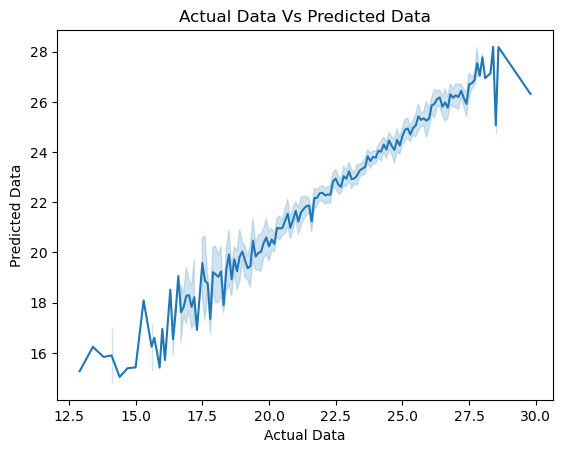

In [120]:
sns.lineplot(x=y_test, y=y_pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Actual Data Vs Predicted Data')
plt.show()

In [121]:
print('Mean absolute error :',mean_absolute_error(y_test,y_pred))
print('Mean squared error :',mean_squared_error(y_test,y_pred))
print('Root mean squared error :', np.sqrt(mean_squared_error(y_test,y_pred)))

Mean absolute error : 0.8183753489691807
Mean squared error : 1.1003265764683674
Root mean squared error : 1.048964525838871


In [123]:
lasscv = LassoCV(alphas=None,max_iter=1000,precompute=True)
lasscv.fit(x_train,y_train)

LassoCV(precompute=True)

In [124]:
alpha = lasscv.alpha_
alpha

0.0019784708527699588

In [125]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.0019784708527699588)

In [126]:
lasso_reg.score(x_test,y_test)

0.8246590487560128

In [127]:
ada = AdaBoostRegressor()

In [128]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [129]:
y_pred = ada.predict(x_train)

In [130]:
print("R square score:",r2_score(y_train,y_pred))

R square score: 0.8259105624924996


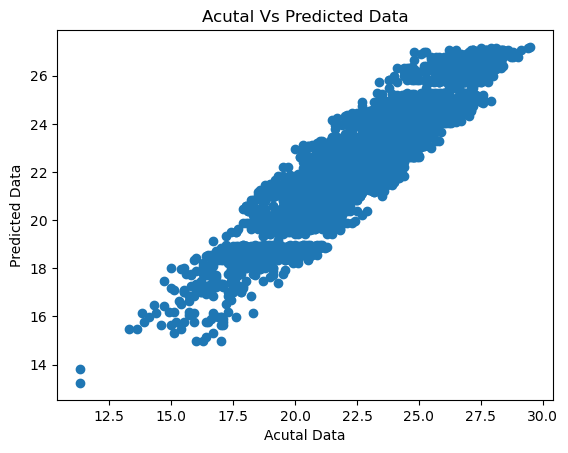

In [131]:
plt.scatter(y_train,y_pred)
plt.xlabel('Acutal Data')
plt.ylabel('Predicted Data')
plt.title('Acutal Vs Predicted Data')
plt.show()

In [132]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 

In [133]:
dt = DecisionTreeRegressor()
params = {'n_estimators':[40,47,49,50],
         'learning_rate':[0.30,0.40,0.45]}

In [134]:
rad_scr = RandomizedSearchCV(AdaBoostRegressor(),cv=2,param_distributions=params)

In [135]:
rad_scr.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.3, 0.4, 0.45],
                                        'n_estimators': [40, 47, 49, 50]})

In [136]:
rad_scr.best_params_

{'n_estimators': 50, 'learning_rate': 0.45}

In [137]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [138]:
y_pred=ada.predict(x_test)
print('***Accuracy post tuning***')
print(r2_score(y_test,y_pred))

***Accuracy post tuning***
0.8160555954483515


In [139]:
import joblib 
joblib.dump(regression,"TempearaturePrediction-Next_Tmin.pkl")

['TempearaturePrediction-Next_Tmin.pkl']